In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
import cycler

from scipy import stats
import math
import numpy as np
import sys


aniu_gtdb = "../precomputed_results//gtdb_aniu.txt"
aniu_D3 = "../precomputed_results/D3_aniu.txt"
refseq_aai = "../precomputed_results/refseq_aai-k12.txt"
skani_gtdb = "../results/gtdb_skani.txt"
skani_D3 = "../results/D3_skani.txt"
refseq_skani = "../results/refseq_skani_aai-k12.txt"
mash_gtdb = "../results/gtdb_mash.txt"
mash_D3 = "../results/D3_mash.txt"
refseq_sourmash = "../results/refseq_sourmash_aai-k12.txt"
fastani_gtdb = "../precomputed_results/gtdb_fastani.txt"
fastani_D3 = "../results/D3_fastani.txt"
refseq_fastaai = "../results/refseq_fastaai-k12.txt"
ref_file_i = [aniu_D3, aniu_gtdb, refseq_aai]
other_files_i = [[fastani_D3,mash_D3,skani_D3,], [fastani_gtdb, mash_gtdb,skani_gtdb], [ refseq_fastaai, refseq_sourmash, refseq_skani]]
D3_gstawk = "../precomputed_results/d3_gstawk.txt"


#Vary the n50 threshold to reproduce FastANI's results.
n50_thresh = 0
#n50_thresh = 10000



../results/D3_fastani.txt
../results/D3_fastani.txt R:  0.9683161722140182
../results/D3_fastani.txt MAE:  0.20841568401658211
../results/D3_mash.txt
../results/D3_mash.txt R:  0.8803145426668446
../results/D3_mash.txt MAE:  0.16957028848687292
../results/D3_skani.txt
../results/D3_skani.txt R:  0.9803598574740833
../results/D3_skani.txt MAE:  0.11657890373099976
../precomputed_results/gtdb_fastani.txt
../precomputed_results/gtdb_fastani.txt R:  0.9989697067638602
../precomputed_results/gtdb_fastani.txt MAE:  0.8447346153846158
../results/gtdb_mash.txt
../results/gtdb_mash.txt R:  0.9793331711622937
../results/gtdb_mash.txt MAE:  1.1834650000000009
../results/gtdb_skani.txt
../results/gtdb_skani.txt R:  0.9972693079449584
../results/gtdb_skani.txt MAE:  1.2007653846153856
../results/refseq_fastaai-k12.txt
../results/refseq_fastaai-k12.txt R:  0.9664183517085841
../results/refseq_fastaai-k12.txt MAE:  5.045267947368421
../results/refseq_sourmash_aai-k12.txt
../results/refseq_sourmash_aa

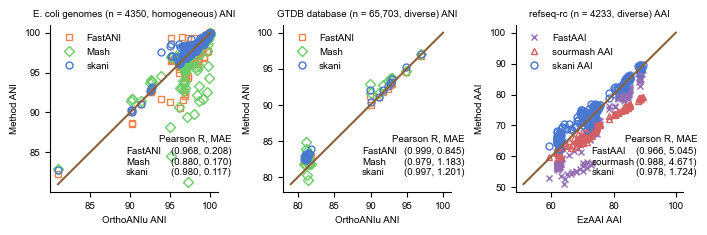

In [53]:
gstawk_dict = dict()
for line in open(D3_gstawk, 'r'):
    if 'assembly' in line:
        continue
    spl = line.split('\t')
    spl_g = spl[0].split('/')[-1].split('.')[0]
    genome = spl_g
    N50 = int(spl[-2])
    gstawk_dict[genome] = N50

plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.family':'arial'})
cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(18*cm, 6*cm))
d_max = 100000
cmap = sns.color_palette("muted")
line_colour = cmap[5]

for j in range(3):
    refs_to_ani = dict()
    ref_file = ref_file_i[j]
    other_files = other_files_i[j]
    for line in open(ref_file, 'r'):
        spl = line.split()
        if "skani" in ref_file or "aniu" in ref_file:
            other_ref = spl[0]
        elif "aai" in ref_file:
            other_ref = spl[2]
        else:
            other_ref = spl[1]
        other_ref = other_ref.split("/")[-1].split('.')[0]
        if 'D3' in ref_file and gstawk_dict[other_ref] < n50_thresh:
            continue
        if "fastani" in ref_file or "anim" in ref_file:
            refs_to_ani[other_ref] = [float(spl[2])]
        elif "mash" in ref_file:
            refs_to_ani[other_ref] = [(1 - float(spl[2])) * 100]
        elif "aniu" in ref_file:
            refs_to_ani[other_ref] = [float(spl[3])]
        elif "aai" in ref_file:
            if spl[4] == "Label":
                continue
            refs_to_ani[other_ref] = [float(spl[4])]
        else:
            refs_to_ani[other_ref] = [float(spl[2]) * 100]

    for file in other_files:
        if "sourmash" in file:
            for line in open(file, 'r'):
                spl = line.split(',')
                other_ref = spl[2]
                other_ref = other_ref.split("/")[-1][0:-4]
                other_ref = other_ref.split('.')[0]
                if other_ref in refs_to_ani:
                    try:
                        ani = float(spl[7])
                        refs_to_ani[other_ref].append(ani * 100)
                    except ValueError:
                        x = 5

                continue
        else:
            for line in open(file, 'r'):
                spl = line.split()
                if "skani" in file or "aniu" in file or "mash" in file:
                    if "Ref_file" in line:
                        continue
                    other_ref = spl[0]
                    if "NaN" in line:
                        continue
                else:
                    other_ref = spl[1]
                other_ref = other_ref.split("/")[-1].split('.')[0]
                if other_ref in refs_to_ani:
                    try:
                        if "fastani" in file or "anim" in file:
                            refs_to_ani[other_ref].append(float(spl[2]))
                        elif "mash" in file:
                            refs_to_ani[other_ref].append((1 - float(spl[2])) * 100)
                        elif "aniu" in file:
                            refs_to_ani[other_ref].append(float(spl[3]))
                        elif "fastaai" in file:
                            refs_to_ani[other_ref].append(float(spl[-1]))
                        else:
                            refs_to_ani[other_ref].append(float(spl[2]) * 100)
                    except:
                        x = 5

    todel = []
    for key in refs_to_ani.keys():
        if len(refs_to_ani[key]) < len(other_files) + 1:
            todel.append(key)
    for key in todel:
        del refs_to_ani[key]

    points = np.array([x for x in refs_to_ani.values()])
    diff = 0
    worst = "na"
    sort_vec = []
    smallest_val = 100
    for (key,value) in refs_to_ani.items():
        for val in value:
            if val < smallest_val:
                smallest_val = val
        sort_vec.append((key,value))

    sort_vec  = sorted(sort_vec, key=lambda x: abs(x[1][0] - x[1][1]), reverse=True)
    oned_sort = np.array([x[1] for x in sort_vec])
    lr_results = []
    l1_results = []
    ax = plt.subplot(1,3,j+1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


    for i in range(len(other_files)):
        print(other_files[i])
        l1_results.append(np.linalg.norm([x[1][0] - x[1][i+1] for x in sort_vec], ord=1))
        lr_results.append(stats.linregress(oned_sort[:,0], oned_sort[:,i+1]))
        print(other_files[i], 'R: ', lr_results[-1].rvalue)
        print(other_files[i], 'MAE: ', l1_results[-1]/ len(oned_sort))

    text1 = f"({lr_results[0].rvalue:.3f}, {(l1_results[0])/len(oned_sort):.3f})"
    text2 = f"({lr_results[1].rvalue:.3f}, {(l1_results[1])/len(oned_sort):.3f})"
    text3 = f"({lr_results[2].rvalue:.3f}, {(l1_results[2])/len(oned_sort):.3f})"
    
    result_text = text1 + '\n' + text2 + '\n' + text3 
    xloc = 0.72
    yloc = 0.10
    label_text = "Pearson R, MAE"
    if j == 1:
        title = "GTDB database (n = 65,703, diverse) ANI"
        method_text = "FastANI\nMash\nskani"

        plt.text(xloc-0.07,yloc+0.2, label_text,transform=ax.transAxes)
        plt.text(xloc,yloc, result_text,transform=ax.transAxes)
        plt.text(xloc-0.25,yloc, method_text,transform=ax.transAxes)

    elif j == 2:
        off = -30
        offx = -15
        title = "refseq-rc (n = 4233, diverse) AAI"
        method_text = "FastAAI\nsourmash\nskani"
        plt.text(xloc-0.07,yloc+0.2, label_text,transform=ax.transAxes)
        plt.text(xloc,yloc, result_text,transform=ax.transAxes)
        plt.text(xloc-0.27,yloc, method_text,transform=ax.transAxes)
    else:
        off = 2
        offx = 0
        title = "E. coli genomes (n = 4350, homogeneous) ANI"
        method_text = "FastANI\nMash\nskani"
        plt.text(xloc-0.07,yloc+0.2, label_text,transform=ax.transAxes)
        plt.text(xloc,yloc, result_text,transform=ax.transAxes)
        plt.text(xloc-0.27,yloc, method_text,transform=ax.transAxes)


    for i in range(len(other_files)):
        label = ""
        vals = f"Pearson R = {lr_results[i].rvalue:.3f}, L1 = {int(l1_results[i])}"
        vals = ""
        marker = 'o'
        c = cmap[0]
        if 'fastani' in other_files[i]:
            marker = 's'
            label = f"FastANI" + vals
            c = cmap[1]
        elif 'sourmash' in other_files[i]:
            marker = '^'
            label = f"sourmash AAI" + vals
            c = cmap[3]
        elif 'fastaai' in other_files[i]:
            marker = 'x'
            label = f"FastAAI" + vals
            c = cmap[4]
        elif 'mash' in other_files[i]:
            marker = 'D'
            label = f"Mash" + vals
            c = cmap[2]
        elif 'skani' in other_files[i]:
            marker = 'o'
            if 'refseq' in other_files[i] or 'aai' in other_files[i]:
                label = f"skani AAI" + vals
            else:
                label = f"skani" + vals

        #plt.scatter(points[:,0], points[:,i+1], label = other_files[i], alpha = 0.75)
        if len(points) > d_max:
            ax.plot(points[:d_max,0], points[:d_max,i+1],  marker, label = label, fillstyle='none', alpha=1.0, ms = 5.0, c=c, mew=1.0)
        else:
            ax.plot(points[:,0], points[:,i+1],  marker, label = label, fillstyle='none', alpha=1.0, ms = 5.0, c=c, mew=1.0)
        #plt.plot(points[:,0], points[:,i+1],  'o', label = other_files[i], alpha=0.5)
    if 'aniu' in ref_file:
        plt.xlabel("OrthoANIu ANI")
        plt.ylabel("Method ANI")
    else:
        plt.xlabel("EzAAI AAI")
        plt.ylabel("Method AAI")
    plt.legend(loc='upper left')
    plt.legend(frameon=False)
    plt.title(title, fontsize = 7)
    ax.plot(range(int(smallest_val),101), range(int(smallest_val),101), c = line_colour)


plt.savefig('figures/ani_aai_plot.png', transparent = True, dpi = 600, )
plt.show()